In [57]:
from keras.models import Model
from keras.layers import Input, Dense, LSTM, Bidirectional
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

In [62]:
# 학습 데이터를 생성한다.
# ex: data = [1,2,3,4,5,6,7,8,9,10]가 주어졌을 때 generateX(data, 5)를 실행하면
# 아래와 같은 학습데이터 변환한다.
#
# x                      y
# ---------              -
# 1,2,3,4,5              6
# 2,3,4,5,6              7
# 3,4,5,6,7              8
# ...

def generateX(a, n):
    x_train = []
    y_train = []
    for i in range(len(a)):
        x = a[i:(i + n)]
        if (i + n) < len(a):
            x_train.append(x)
            y_train.append(a[i + n])
        else:
            break
    return np.array(x_train), np.array(y_train)

In [65]:
# Sine 함수에 노이즈를 섞은 데이터로 학습 데이터 100개를 생성한다
data = np.sin(2 * np.pi * 0.03 * np.arange(0, 100)) + np.random.random(100)
x, y = generateX(data, 10)
x = x.reshape(-1,10,1)
y = y.reshape(-1,1)

In [66]:
# 학습용 데이터와 시험용 데이터
x_train = x[:70, :, :]
y_train = y[:70:, :]
x_test = x[70:, :, :]
y_test = y[70:, :]

In [67]:
x_train

array([[[ 0.20482342],
        [ 1.11915233],
        [ 0.37184008],
        [ 1.08650369],
        [ 1.05927272],
        [ 1.34108374],
        [ 1.05784907],
        [ 1.69857913],
        [ 1.3261287 ],
        [ 1.94640872]],

       [[ 1.11915233],
        [ 0.37184008],
        [ 1.08650369],
        [ 1.05927272],
        [ 1.34108374],
        [ 1.05784907],
        [ 1.69857913],
        [ 1.3261287 ],
        [ 1.94640872],
        [ 1.19230581]],

       [[ 0.37184008],
        [ 1.08650369],
        [ 1.05927272],
        [ 1.34108374],
        [ 1.05784907],
        [ 1.69857913],
        [ 1.3261287 ],
        [ 1.94640872],
        [ 1.19230581],
        [ 1.12412913]],

       [[ 1.08650369],
        [ 1.05927272],
        [ 1.34108374],
        [ 1.05784907],
        [ 1.69857913],
        [ 1.3261287 ],
        [ 1.94640872],
        [ 1.19230581],
        [ 1.12412913],
        [ 0.81447475]],

       [[ 1.05927272],
        [ 1.34108374],
        [ 1.05784907],
   

In [68]:
x_train.shape[2]

1

In [69]:
y_train

array([[ 1.19230581],
       [ 1.12412913],
       [ 0.81447475],
       [ 1.44917416],
       [ 0.66949358],
       [ 0.78584809],
       [ 0.81632716],
       [ 0.67406796],
       [ 0.07753371],
       [ 0.28493505],
       [ 0.09668378],
       [ 0.24741689],
       [-0.16807805],
       [-0.64939838],
       [-0.0349736 ],
       [-0.48010282],
       [-0.09398701],
       [-0.36493588],
       [-0.4882424 ],
       [ 0.20898469],
       [ 0.08844075],
       [ 0.50012783],
       [ 0.51270306],
       [ 0.76088975],
       [ 0.79276558],
       [ 0.81745151],
       [ 1.08267042],
       [ 1.30778649],
       [ 0.94459012],
       [ 1.8350116 ],
       [ 1.66083588],
       [ 1.48893499],
       [ 1.75953046],
       [ 1.90477017],
       [ 1.89423808],
       [ 1.65849416],
       [ 1.08755672],
       [ 0.80490083],
       [ 0.66515105],
       [ 1.08389658],
       [ 0.47101667],
       [ 0.77284851],
       [ 0.23471029],
       [ 0.41060987],
       [-0.00593466],
       [-0

In [70]:
# 2층-양방항 구조의 LSTM 모델을 생성한다.
K.clear_session()     # 모델 생성전에 tensorflow의 graph 영역을 clear한다.
xInput = Input(batch_shape=(None, x_train.shape[1], x_train.shape[2]))
# batch_shape=(data_size(생략가능), time_step_size(여기서는 10개), 
# LSTM 입력층에 입력되는 데이터 개수(feaure 개수(여기서는 1개)))
xLstm_1 = LSTM(10, return_sequences = True)(xInput)
# stacked LSTM이라 return_sequences 가 true인거임.
xLstm_2 = Bidirectional(LSTM(10))(xLstm_1)
xOutput = Dense(1)(xLstm_2)

model = Model(xInput, xOutput)
model.compile(loss='mse', optimizer='adam')

In [71]:
# 학습
model.fit(x_train, y_train, epochs=500, batch_size=20,verbose=1)

Epoch 1/500
70/70 [==============================] - 3s 39ms/step - loss: 0.8664
Epoch 2/500
70/70 [==============================] - 0s 786us/step - loss: 0.7957
Epoch 3/500
70/70 [==============================] - 0s 771us/step - loss: 0.7280
Epoch 4/500
70/70 [==============================] - 0s 714us/step - loss: 0.6695
Epoch 5/500
70/70 [==============================] - 0s 729us/step - loss: 0.6167
Epoch 6/500
70/70 [==============================] - 0s 729us/step - loss: 0.5729
Epoch 7/500
70/70 [==============================] - 0s 843us/step - loss: 0.5288
Epoch 8/500
70/70 [==============================] - 0s 843us/step - loss: 0.4995
Epoch 9/500
70/70 [==============================] - 0s 729us/step - loss: 0.4792
Epoch 10/500
70/70 [==============================] - 0s 757us/step - loss: 0.4596
Epoch 11/500
70/70 [==============================] - 0s 800us/step - loss: 0.4481
Epoch 12/500
70/70 [==============================] - 0s 786us/step - loss: 0.4430
Epoch 13/500
7

70/70 [==============================] - 0s 729us/step - loss: 0.0873
Epoch 100/500
70/70 [==============================] - 0s 757us/step - loss: 0.0864
Epoch 101/500
70/70 [==============================] - 0s 729us/step - loss: 0.0864
Epoch 102/500
70/70 [==============================] - 0s 714us/step - loss: 0.0862
Epoch 103/500
70/70 [==============================] - 0s 671us/step - loss: 0.0862
Epoch 104/500
70/70 [==============================] - 0s 686us/step - loss: 0.0862
Epoch 105/500
70/70 [==============================] - 0s 671us/step - loss: 0.0856
Epoch 106/500
70/70 [==============================] - 0s 686us/step - loss: 0.0860
Epoch 107/500
70/70 [==============================] - 0s 729us/step - loss: 0.0857
Epoch 108/500
70/70 [==============================] - 0s 714us/step - loss: 0.0859
Epoch 109/500
70/70 [==============================] - 0s 729us/step - loss: 0.0854
Epoch 110/500
70/70 [==============================] - 0s 743us/step - loss: 0.0851
Epoch 

70/70 [==============================] - 0s 829us/step - loss: 0.0767
Epoch 197/500
70/70 [==============================] - 0s 743us/step - loss: 0.0769
Epoch 198/500
70/70 [==============================] - 0s 743us/step - loss: 0.0771
Epoch 199/500
70/70 [==============================] - 0s 757us/step - loss: 0.0770
Epoch 200/500
70/70 [==============================] - 0s 757us/step - loss: 0.0769
Epoch 201/500
70/70 [==============================] - 0s 729us/step - loss: 0.0776
Epoch 202/500
70/70 [==============================] - 0s 757us/step - loss: 0.0763
Epoch 203/500
70/70 [==============================] - 0s 743us/step - loss: 0.0782
Epoch 204/500
70/70 [==============================] - 0s 729us/step - loss: 0.0770
Epoch 205/500
70/70 [==============================] - 0s 743us/step - loss: 0.0761
Epoch 206/500
70/70 [==============================] - 0s 671us/step - loss: 0.0763
Epoch 207/500
70/70 [==============================] - 0s 743us/step - loss: 0.0762
Epoch 

70/70 [==============================] - 0s 800us/step - loss: 0.0715
Epoch 294/500
70/70 [==============================] - 0s 771us/step - loss: 0.0708
Epoch 295/500
70/70 [==============================] - 0s 757us/step - loss: 0.0714
Epoch 296/500
70/70 [==============================] - 0s 757us/step - loss: 0.0699
Epoch 297/500
70/70 [==============================] - 0s 786us/step - loss: 0.0709
Epoch 298/500
70/70 [==============================] - 0s 829us/step - loss: 0.0707
Epoch 299/500
70/70 [==============================] - 0s 714us/step - loss: 0.0705
Epoch 300/500
70/70 [==============================] - 0s 700us/step - loss: 0.0699
Epoch 301/500
70/70 [==============================] - 0s 700us/step - loss: 0.0699
Epoch 302/500
70/70 [==============================] - 0s 729us/step - loss: 0.0701
Epoch 303/500
70/70 [==============================] - 0s 700us/step - loss: 0.0698
Epoch 304/500
70/70 [==============================] - 0s 729us/step - loss: 0.0699
Epoch 

70/70 [==============================] - 0s 829us/step - loss: 0.0656
Epoch 391/500
70/70 [==============================] - 0s 729us/step - loss: 0.0658
Epoch 392/500
70/70 [==============================] - 0s 729us/step - loss: 0.0653
Epoch 393/500
70/70 [==============================] - 0s 700us/step - loss: 0.0660
Epoch 394/500
70/70 [==============================] - 0s 700us/step - loss: 0.0653
Epoch 395/500
70/70 [==============================] - 0s 700us/step - loss: 0.0659
Epoch 396/500
70/70 [==============================] - 0s 686us/step - loss: 0.0664
Epoch 397/500
70/70 [==============================] - 0s 757us/step - loss: 0.0651
Epoch 398/500
70/70 [==============================] - 0s 714us/step - loss: 0.0653
Epoch 399/500
70/70 [==============================] - 0s 686us/step - loss: 0.0649
Epoch 400/500
70/70 [==============================] - 0s 686us/step - loss: 0.0651
Epoch 401/500
70/70 [==============================] - 0s 729us/step - loss: 0.0648
Epoch 

70/70 [==============================] - 0s 729us/step - loss: 0.0594
Epoch 488/500
70/70 [==============================] - 0s 743us/step - loss: 0.0593
Epoch 489/500
70/70 [==============================] - 0s 729us/step - loss: 0.0599
Epoch 490/500
70/70 [==============================] - 0s 743us/step - loss: 0.0599
Epoch 491/500
70/70 [==============================] - 0s 729us/step - loss: 0.0593
Epoch 492/500
70/70 [==============================] - 0s 714us/step - loss: 0.0590
Epoch 493/500
70/70 [==============================] - 0s 757us/step - loss: 0.0601
Epoch 494/500
70/70 [==============================] - 0s 786us/step - loss: 0.0592
Epoch 495/500
70/70 [==============================] - 0s 771us/step - loss: 0.0584
Epoch 496/500
70/70 [==============================] - 0s 757us/step - loss: 0.0590
Epoch 497/500
70/70 [==============================] - 0s 771us/step - loss: 0.0600
Epoch 498/500
70/70 [==============================] - 0s 857us/step - loss: 0.0585
Epoch 

In [72]:
# 예측
y_hat = model.predict(x_test, batch_size=1)

In [80]:
x_test

array([[[ 1.55420318],
        [ 0.81258418],
        [ 1.18093933],
        [ 1.67773581],
        [ 1.62635255],
        [ 1.48326845],
        [ 1.31719198],
        [ 1.35616815],
        [ 1.04057119],
        [ 0.9061694 ]],

       [[ 0.81258418],
        [ 1.18093933],
        [ 1.67773581],
        [ 1.62635255],
        [ 1.48326845],
        [ 1.31719198],
        [ 1.35616815],
        [ 1.04057119],
        [ 0.9061694 ],
        [ 1.41669627]],

       [[ 1.18093933],
        [ 1.67773581],
        [ 1.62635255],
        [ 1.48326845],
        [ 1.31719198],
        [ 1.35616815],
        [ 1.04057119],
        [ 0.9061694 ],
        [ 1.41669627],
        [ 0.80560386]],

       [[ 1.67773581],
        [ 1.62635255],
        [ 1.48326845],
        [ 1.31719198],
        [ 1.35616815],
        [ 1.04057119],
        [ 0.9061694 ],
        [ 1.41669627],
        [ 0.80560386],
        [ 1.09054266]],

       [[ 1.62635255],
        [ 1.48326845],
        [ 1.31719198],
   

In [82]:
y_hat_g=generateX(y_hat, 10)

In [83]:
yy_hat = model.predict(y_hat_g, batch_size=1)

AttributeError: 'tuple' object has no attribute 'ndim'

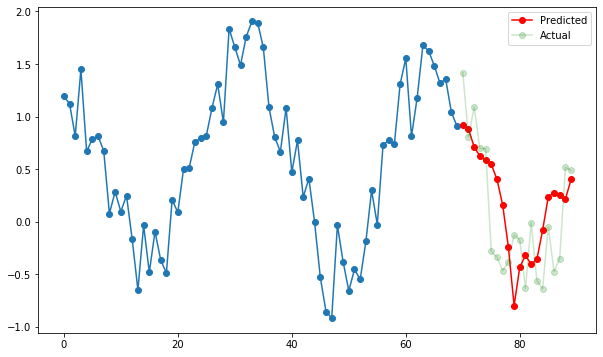

In [74]:
# 예측 결과 시각화
a_axis = np.arange(0, len(y_train))
b_axis = np.arange(len(y_train), len(y_train) + len(y_hat))

plt.figure(figsize=(10,6))
plt.plot(a_axis, y_train.reshape(70,), 'o-')
plt.plot(b_axis, y_hat.reshape(20,), 'o-', color='red', label='Predicted')
plt.plot(b_axis, y_test.reshape(20,), 'o-', color='green', alpha=0.2, label='Actual')
plt.legend()
plt.show()